In [29]:
import pandas as pd

In [30]:
cp_dataset=pd.read_csv("newcropdata.csv")

In [31]:
cp_dataset.head()

,Crop_Year,Area,Yield,Temperature,Precipitaion,Humidity,Soil_type:_chalky,Soil_type:_clay,Crop:_Jowar,Crop:_Wheat,Season:_Kharif,Season:_Rabi
0,1997,598400,217000,24.2430,42.3484,84,0,1,1,0,0,1
1,1998,453200,227900,23.1000,8.7838,70,0,0,1,0,0,1
2,1999,498300,190900,22.8118,39.5078,35,0,0,1,0,0,1
3,2000,518700,160800,23.2746,9.2558,33,0,1,1,0,0,1
4,2001,528900,175000,23.5674,4.0668,29,0,1,1,0,0,1


In [32]:
cp_dataset.columns

Index(['Crop_Year', 'Area', 'Yield', 'Temperature', 'Precipitaion', 'Humidity',
       'Soil_type:_chalky', 'Soil_type:_clay', 'Crop:_Jowar', 'Crop:_Wheat',
       'Season:_Kharif', 'Season:_Rabi'],
      dtype='object')

In [33]:
cp_dataset.size


16140

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

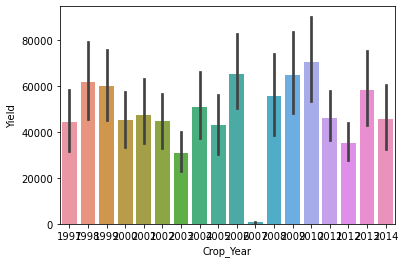

In [35]:
ax = sns.barplot(x="Crop_Year", y="Yield", data=cp_dataset)

<AxesSubplot:xlabel='Yield', ylabel='Density'>

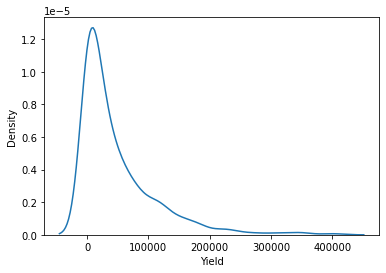

In [36]:
sns.kdeplot(data=cp_dataset, x="Yield")

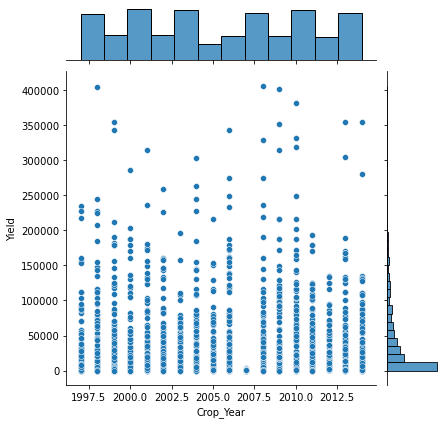

In [37]:
sns.jointplot(data=cp_dataset, x="Crop_Year", y="Yield")

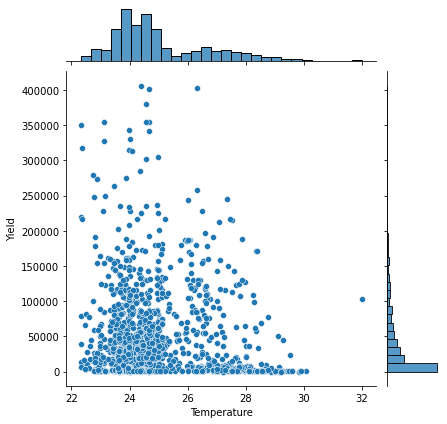

In [38]:
sns.jointplot(data=cp_dataset, x="Temperature", y="Yield")

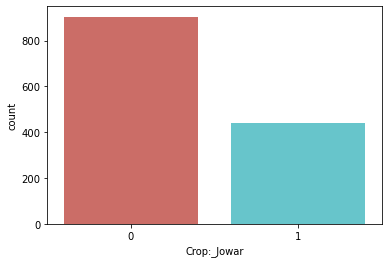

<Figure size 432x288 with 0 Axes>

In [39]:
sns.countplot(x='Crop:_Jowar',data=cp_dataset,palette='hls')
plt.show()
plt.savefig('count_plot')

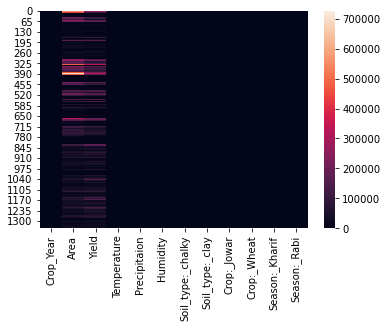

In [40]:
hm = sns.heatmap(data = cp_dataset)
plt.show()

In [41]:
from sklearn.utils import shuffle
cp_dataset =shuffle(cp_dataset,random_state=42)
from sklearn.model_selection import train_test_split

In [57]:
X = cp_dataset.loc[:, cp_dataset.columns != "Yield"]
y = cp_dataset.loc[:, cp_dataset.columns == "Yield"]
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
columns = X_train.columns
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1076, 11), (269, 11), (1076, 1), (269, 1))

In [69]:
from sklearn import metrics

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [71]:
predicted_yield = regressor.predict(X_test)

In [72]:
print('Mean sAbsolute Error:', metrics.mean_absolute_error( y_test, predicted_yield))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted_yield)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_yield)))

Mean sAbsolute Error: 19317.268871420747
Mean Squared Error: 874311654.6717197
Root Mean Squared Error: 29568.76146665125


In [73]:
cp_dataset.columns

Index(['Crop_Year', 'Area', 'Yield', 'Temperature', 'Precipitaion', 'Humidity',
       'Soil_type:_chalky', 'Soil_type:_clay', 'Crop:_Jowar', 'Crop:_Wheat',
       'Season:_Kharif', 'Season:_Rabi'],
      dtype='object')

In [74]:
cp_dataset.head(20)

,Crop_Year,Area,Yield,Temperature,Precipitaion,Humidity,Soil_type:_chalky,Soil_type:_clay,Crop:_Jowar,Crop:_Wheat,Season:_Kharif,Season:_Rabi
286,2002,10100,5300,23.6562,27.7342,36,0,0,1,0,0,1
261,2009,29600,21900,23.6160,30.1252,53,0,0,1,0,0,1
1222,2009,59600,91800,24.1010,23.3434,79,0,0,0,1,0,0
210,2009,12800,16900,24.0086,40.8440,53,0,1,1,0,0,1
221,2002,29100,20500,24.3446,47.6166,35,0,0,1,0,0,1
787,2012,6300,200,25.8100,118.9130,62,0,1,0,0,1,0
818,2006,800,400,26.0000,365.8350,58,0,0,0,0,1,0
163,2013,10100,11200,24.7466,28.6832,43,0,0,1,0,0,1
1255,2006,43100,78100,24.7168,36.1714,44,0,0,0,1,0,0
76,1999,1400,600,23.6512,23.4222,41,0,0,1,0,0,1


In [75]:
predicted_yield=regressor.predict([[2002,29100,24.3446,47.6166,35,0,0,1,0,0,1]])
print("Predicted crop yield for given set of data is:",predicted_yield)

Predicted crop yield for given set of data is: [[15320.28245057]]


In [76]:
predicted_yield=regressor.predict([[2014,5900,24.5462,38.6634,51,0,0,1,0,0,1]])
print("Predicted crop yield for given set of data is:",predicted_yield)

Predicted crop yield for given set of data is: [[10156.05167624]]


In [ ]:
from tkinter import *
from tkinter import ttk


root= Tk()
root.geometry("750x750")
root.title("Crop Yield Predictor")

def values():
    global new_year
    global new_area
    global new_temperature
    global new_precipitation
    global new_humidity
    global new_soilchalky
    global new_soilclay
    global new_bajra
    global new_wheat
    global new_seasonrabi
    global new_seasonkharif
    
    new_year=year_enter.get()
    new_area=area_enter.get()
    new_temperature=temperature_enter.get()
    new_precipitation=precipitation_enter.get()
    new_humidity=humidity_enter.get()
    new_soilchalky=chalky_enter.get()
    new_soilclay=clay_enter.get()
    new_bajra=bajra_enter.get()
    new_wheat=wheat_enter.get()
    new_seasonrabi=rabi_enter.get()
    new_seasonkharif=kharif_enter.get()

   
    predicted_yield=('Predicted Yield is :',regressor.predict([[new_year,new_area,new_temperature,new_precipitation,new_humidity,new_soilchalky,new_soilclay,new_bajra,new_wheat,new_seasonrabi,new_seasonkharif]]),"Kg")
    label_prediction=Label(root,text=predicted_yield,bg='Red',font=("new roman",17,"bold"))
    label_prediction.grid(row=15,column=2)
    



year=Label(root,text="Enter Year", font=("new roman",17,"bold") ,fg="black").grid(row=1,column=0)
year_enter= ttk.Combobox(root, width="10", font=("new roman",10,"bold"),value=['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
year_enter.grid(row=1,column=3)
area=Label(root,text="Enter Area", font=("new roman",17,"bold"),fg="black").grid(row=2,column=0)
area_enter= Entry(root, font=("new roman",10),width="13", fg="black")
area_enter.grid(row=2,column=3)
temperature=Label(root,text="Enter Temperature", font=("new roman",17,"bold"),fg="black").grid(row=3,column=0)
temperature_enter= Entry(root, font=("new roman",10),width='13',fg="black")

temperature_enter.grid(row=3,column=3)
precipitation=Label(root,text="Enter Precipition", font=("new roman",17,"bold"),fg="black").grid(row=4,column=0)
precipitation_enter= Entry(root, font=("new roman",10),width='13',
                  fg="black")
precipitation_enter.grid(row=4,column=3)
humidity=Label(root,text="Enter Humidity", font=("new roman",17,"bold"),fg="black").grid(row=5,column=0)
humidity_enter= Entry(root, font=("new roman",10),width='13',fg="black")
humidity_enter.grid(row=5,column=3)
clay=Label(root,text="Is Soil:Clay?", font=("new roman",17,"bold"),fg="black").grid(row=6,column=0)
clay_enter= ttk.Combobox(root, width="10", font=("new roman",10,"bold"),value=['0','1'])
clay_enter.grid(row=6,column=3)
chalky=Label(root,text="Is Soil:Chalky?", font=("new roman",17,"bold"),fg="black").grid(row=7,column=0)
chalky_enter=  ttk.Combobox(root, width="10", font=("new roman",10,"bold"),value=['0','1'])
chalky_enter.grid(row=7,column=3)
bajra=Label(root,text="Is Crop:Bajra?", font=("new roman",17,"bold"),fg="black").grid(row=8,column=0)
bajra_enter=  ttk.Combobox(root, width="10", font=("new roman",10,"bold"),value=['0','1'])
bajra_enter.grid(row=8,column=3)
wheat=Label(root,text="Is Crop:Wheat?", font=("new roman",17,"bold"), fg="black").grid(row=9,column=0)
wheat_enter=  ttk.Combobox(root, width="10", font=("new roman",10,"bold"),value=['0','1'])
wheat_enter.grid(row=9,column=3)
rabi=Label(root,text="Is Season:Rabi?", font=("new roman",17,"bold"),fg="black").grid(row=10,column=0)
rabi_enter=ttk.Combobox (root, width="10", font=("new roman",10,"bold"),value=['0','1'])
rabi_enter.grid(row=10,column=3)
kharif=Label(root,text="Is Season:Kharif?", font=("new roman",17,"bold"), fg="black").grid(row=11,column=0)
kharif_enter=  ttk.Combobox(root, width="10", font=("new roman",10,"bold"),value=['0','1'])
kharif_enter.grid(row=11,column=3) 

Predict= Button(root, text="Predict Now", relief=SUNKEN,activebackground="red",width=10,height=2,command=values).grid(row=14,column=2)

root.mainloop()

C:\Users\Kumar Deep\anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
